In [1]:
# importing library
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sys
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
# reading data
X = pd.read_csv('data.csv', error_bad_lines = False, header= None, names = ['A', 'B'])
X

,A,B
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507
...,...,...
2995,0.367553,0.745716
2996,1.774294,0.489719
2997,0.666761,-0.325878
2998,-1.255312,0.358632


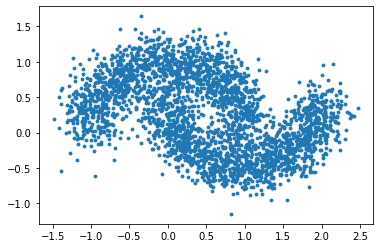

In [3]:
# plotting the data
colors = ["red", "yellow"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(X.A, X.B, cmap=colormap, s=8)

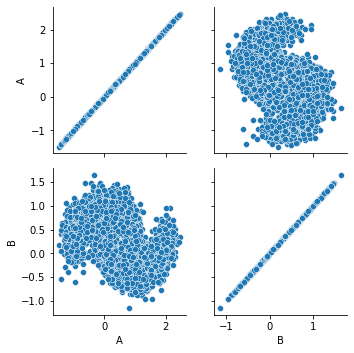

In [4]:
# Visualize the correlation your data and identify variables for further analysis
g = sns.PairGrid(X)
g.map(sns.scatterplot)

# KMeans

C:\Users\akank\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


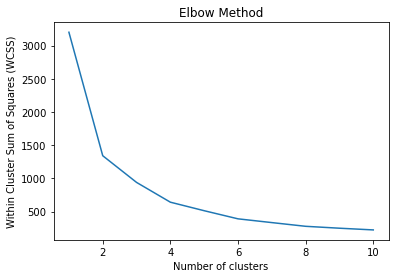

In [5]:
from sklearn.cluster import KMeans
# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    kmeans.fit(X)                              
    wcss.append(kmeans.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 2,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 1, ..., 1, 0, 0])

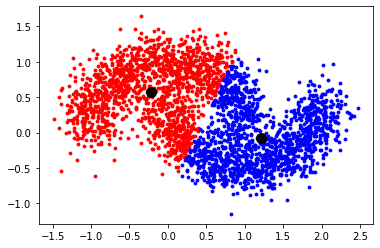

In [7]:
# Plot the clusters
X = np.array(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=8, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=8, c='blue', label ='Cluster 2')
#plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=8, c='green', label ='Cluster 3')
#plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

# Plot the clusters centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='black')                           # Set centroid color
plt.show()

In [8]:
kmeans.cluster_centers_

array([[-0.22096929,  0.57239551],
       [ 1.2154569 , -0.07431428]])

In [9]:
kmeans.predict([[0, 0], [12, 3]])

array([0, 1])

# Gaussian Mixture Models

C:\Users\akank\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


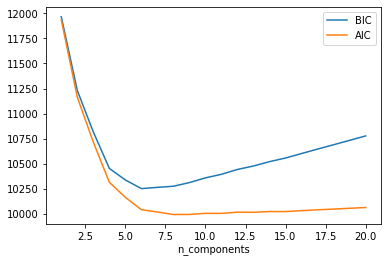

In [10]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [11]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

GaussianMixture(n_components=2)

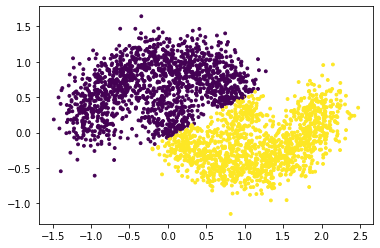

In [12]:
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=8);

# Spectral Clustering

In [13]:
from sklearn.cluster import SpectralClustering

In [14]:
# Preprocessing the data to make it visualizable
  
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the Data
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [15]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters=2, eigen_solver=None, n_components=None, 
                                         random_state=None, n_init=10, gamma=1.0, affinity='rbf', 
                                         n_neighbors=100, eigen_tol=0.0, assign_labels='kmeans', degree=3, 
                                         coef0=1, kernel_params=None, n_jobs=None, verbose=False)
  
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_normalized)

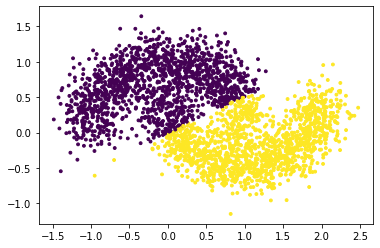

In [16]:
# Building the label to colour mapping
#colours = {}
#colours[0] = 'b'
#colours[1] = 'y'
#colours[2] = 'g'
#colours[3] = 'r'
  
# Building the colour vector for each data point
#cvec = [colours[label] for label in labels_rbf]
  
# Plotting the clustered scatter plot
  
plt.scatter(X[:,0], X[:,1], c=labels_rbf, s=8)
#plt.legend(('Label 0', 'Label 1'))
plt.show()

# Agglomerative Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering

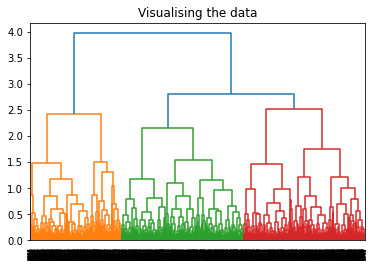

In [18]:
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='complete')))

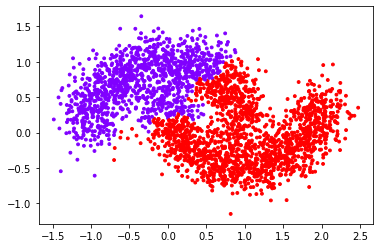

In [19]:
ac2 = AgglomerativeClustering(n_clusters = 2, affinity= 'manhattan', memory=None, connectivity=None, 
                              compute_full_tree='auto', linkage= 'average', distance_threshold=None, compute_distances=False)
  
# Visualizing the clustering

plt.scatter(X[:,0], X[:,1], 
           c = ac2.fit_predict(X), cmap ='rainbow', s= 8)
plt.show()

# DBSCAN

Number of clusters: 2


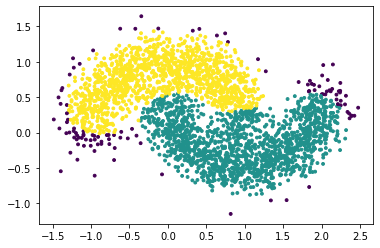

In [20]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps=0.4, min_samples=300).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=8)

print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
#print('Homogeneity: {}'.format(metrics.homogeneity_score(, y_pred)))
#print('Completeness: {}'.format(metrics.completeness_score(, y_pred)))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
      #% metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
      #% metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
      #% metrics.silhouette_score(X, labels)

In [21]:
import sys
np.set_printoptions(threshold = sys.maxsize)

In [22]:
y_pred

array([ 1,  1,  0,  1,  0,  1,  1, -1,  0,  0,  1, -1,  1,  0,  1,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  1, -1,  0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,
        0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0,
        0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1, -1,  0,  0,  0,  0,
        1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  0,
        1,  1,  0, -1,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,
        1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0

In [23]:
np.savetxt("Akanksha_Singh_Assignment2_clusterlabels.csv", y_pred, fmt="%i")

# NMI

In [ ]:
#from sklearn.metrics.cluster import normalized_mutual_info_score
#normalized_mutual_info_score(, y_pred)